In [ ]:
 # prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dummy model for demonstration
model = Sequential([Dense(10, input_shape=(100,)), Dense(1)])

# Save as .h5
model.save("C:/Users/shaik/OneDrive/Desktop/Fruit/jaleel_fixed.h5")

# Test loading the re-saved model
from tensorflow.keras.models import load_model
model = load_model("C:/Users/shaik/OneDrive/Desktop/Fruit/jaleel_fixed.h5")
print("Model loaded successfully!")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model loaded successfully!


Data Acquisition

In [ ]:
# prompt: load  images in  dataset directory

import os
import cv2
import numpy as np

# Replace with your actual dataset directory
dataset_dir = "/content/drive/MyDrive/Dataset"

images = []
labels = []

# Iterate through subdirectories (assuming each subdirectory represents a class)
for class_name in os.listdir(dataset_dir):
  class_dir = os.path.join(dataset_dir, class_name)
  if os.path.isdir(class_dir):
    for image_name in os.listdir(class_dir):
      image_path = os.path.join(class_dir, image_name)
      try:
          # Load image using OpenCV
          img = cv2.imread(image_path)
          if img is not None:
              # Resize or preprocess the image as needed
              img = cv2.resize(img, (224, 224)) # Example resize
              images.append(img)
              labels.append(class_name) # Use the directory name as label
          else:
              print(f"Could not read image: {image_path}")
      except Exception as e:
          print(f"Error processing image {image_path}: {e}")


# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))

# You can further process and split the data into training and testing sets here
# Example:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Could not read image: /content/drive/MyDrive/Dataset/Apple___Apple_scab/train
Could not read image: /content/drive/MyDrive/Dataset/Apple___Apple_scab/test
Number of images loaded: 19519
Number of labels loaded: 19519


Image Contrast Enhancement:

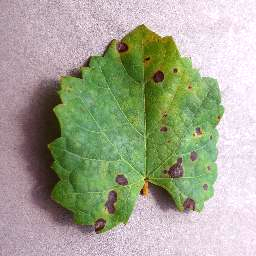

In [ ]:
# prompt: Image Contrast Enhancement:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

def enhance_contrast(image_path, alpha=1.5, beta=0):
  """
  Enhances the contrast of an image.

  Args:
    image_path: Path to the image file.
    alpha: Contrast control (default 1.5).
    beta: Brightness control (default 0).

  Returns:
    The contrast-enhanced image.
  """
  img = cv2.imread(image_path)
  # Check if the image was loaded correctly
  if img is None:
    print(f"Error: Could not load image from {image_path}")
    return None
  new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
  return new_image

# Example usage:
# Make sure 'your_image.jpg' exists in the directory
#The data_dir variable was not defined. Set to the intended value.
data_dir = '/content/drive/MyDrive/Dataset'
image_path = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/Grape___Black_rot/00090b0f-c140-4e77-8d20-d39f67b75fcc___FAM_B.Rot 0376.JPG')  # Replace 'your_image.jpg' with an actual image file name
enhanced_image = enhance_contrast(image_path)

# Check if image was enhanced
if enhanced_image is not None:
  cv2_imshow(enhanced_image)

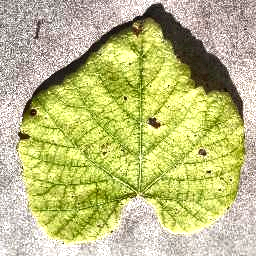

In [ ]:
# prompt: Hybrid Contrast Enhancement Technique:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def hybrid_contrast_enhancement(image_path, alpha=1.5, beta=0, clip_limit=2.0, tile_grid_size=(8, 8)):
  """
  Enhances contrast using a hybrid approach: Adaptive Histogram Equalization (AHE) and contrast stretching.

  Args:
    image_path: Path to the image file.
    alpha: Contrast control for contrast stretching (default 1.5).
    beta: Brightness control for contrast stretching (default 0).
    clip_limit: Clipping limit for AHE (default 2.0).
    tile_grid_size: Grid size for AHE (default (8, 8)).

  Returns:
    The contrast-enhanced image.
  """
  img = cv2.imread(image_path)
  if img is None:
    print(f"Error: Could not load image from {image_path}")
    return None

  # Convert to LAB color space
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

  # Split channels
  l, a, b = cv2.split(lab)

  # Apply CLAHE to L channel
  clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
  cl = clahe.apply(l)

  # Merge channels
  limg = cv2.merge((cl, a, b))

  # Convert back to BGR
  enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

  # Apply contrast stretching
  enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=alpha, beta=beta)

  return enhanced_image

# Example usage:
# Added file name to the path
image_path = '/content/drive/MyDrive/Dataset/Grape___Leaf_blight_(Isariopsis_Leaf_Spot) (2)/00a962ad-573b-44b1-97ae-912a6bd6e0b0___FAM_L.Blight 1431.JPG'
enhanced_image = hybrid_contrast_enhancement(image_path)

if enhanced_image is not None:
  cv2_imshow(enhanced_image)

Data Augmentation

In [ ]:
# prompt: Data Augmentation:
# To increase the size and diversity of the dataset, apply various augmentation techniques:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2 #Make sure cv2 is imported

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load an image to demonstrate augmentation
# Ensure the image exists and the path is correct
image_path = '/content/drive/MyDrive/Dataset/Apple___multiple_diseases (1)/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
  print(f"Error: Could not load image from {image_path}")
else:
  x = img.reshape((1,) + img.shape)

  # Create the directory if it doesn't exist
  save_dir = '/content/drive/MyDrive/Dataset'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Generate augmented images
  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='JPG'):
      i += 1
      if i > 20:
          break

In [ ]:
# prompt: Horizontal Flipping: Flip the images horizontally to create mirror images.

# Define the data augmentation parameters with horizontal flip
datagen = ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
# prompt: Vertical Flipping: Flip the images vertically. and print

# Load an image to demonstrate augmentation
# Ensure the image exists and the path is correct
image_path = '/content/drive/MyDrive/Dataset/Apple___multiple_diseases (1)/02186b4f-a9e1-4d19-ae3d-6cfb0f4b106a___JR_FrgE.S 2828.JPG'
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
  print(f"Error: Could not load image from {image_path}")
else:
  x = img.reshape((1,) + img.shape)

  # Create the directory if it doesn't exist
  save_dir = '/content/drive/MyDrive/Dataset'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Generate augmented images with vertical flip
  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='aug_vertical', save_format='JPG'):
      i += 1
      if i > 20:
          break

In [ ]:
# Define the data augmentation parameters with cropping
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Load an image to demonstrate augmentation
img = cv2.imread(image_path)

if img is None:
  print(f"Error: Could not load image from {image_path}")
else:
  x = img.reshape((1,) + img.shape)

  # Create the directory if it doesn't exist
  save_dir = '/content/drive/MyDrive/Dataset'  # Set save_dir to a valid directory
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Generate augmented images with cropping
  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='aug_cropping', save_format='JPG'):
      i += 1
      if i > 20:
          break

Normalization

In [ ]:
# prompt: Normalization:
# Normalize the pixel values of the images to a range suitable for the deep learning model (e.g., scaling pixel values to the range [0, 1] or [-1, 1]). This helps in speeding up the convergence of the training process.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

# Define the data augmentation parameters with normalization
datagen = ImageDataGenerator(
    rescale=1./255  # Scale pixel values to [0, 1]
    # or
    # samplewise_center=True,  # Subtract the mean of each image
    # samplewise_std_normalization=True  # Divide by the standard deviation of each image
)

# Load an image to demonstrate normalization
#Make sure the path is correct and the image exists at the specified location
image_path = '/content/drive/MyDrive/Dataset/Apple___Cedar_apple_rust (1)/04da297e-5238-41b1-a8a0-0c87c6c2f21f___FREC_C.Rust 4394.JPG'
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
  print(f"Error: Could not load image from {image_path}")
else:
  x = img.reshape((1,) + img.shape)

  # Create the directory if it doesn't exist
  save_dir = '/content/drive/MyDrive/Dataset'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Generate normalized images
  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='aug_normalized', save_format='JPG'):
      i += 1
      if i > 20:
          break

Resizing


In [ ]:
# prompt: Resizing:
# Resize the images to the required input dimensions of the deep learning model (e.g., 299 × 299 pixels for Inception-ResNet-V2). This ensures that all input images are of uniform size.

from PIL import Image

def resize_images(data_dir, target_size=(256, 256)):
  """
  Resizes images in a directory to a specified target size.

  Args:
    data_dir: Path to the directory containing images.
    target_size: Tuple specifying the desired width and height (e.g., (299, 299)).
  """
  for filename in os.listdir(data_dir):
    if filename.endswith(('.JPG', '.jpeg', '.png')):
      image_path = os.path.join(data_dir, filename)
      try:
        img = Image.open(image_path)
        img = img.resize(target_size)
        img.save(image_path)  # Overwrite the original image with the resized one
      except Exception as e:
        print(f"Error resizing image {filename}: {e}")

# Example usage:
resize_images(data_dir, target_size=(256, 256))


Splitting the dataset

In [ ]:
# prompt: Splitting the Dataset:
# Divide the dataset into training and testing sets, typically using a 50:50 split. This allows for proper evaluation of the model's performance on unseen data.

import os
import shutil
import random

def split_dataset(data_dir, train_ratio=0.5):
  """
  Splits the dataset into training and testing sets.

  Args:
    data_dir: Path to the directory containing images.
    train_ratio: Ratio of data to be used for training (default 0.5).
  """
  # Create train and test directories
  train_dir = os.path.join(data_dir, 'train')
  test_dir = os.path.join(data_dir, 'test')
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)

  # Get all image files
  image_files = [f for f in os.listdir(data_dir) if f.endswith(('.JPG', '.jpeg', '.png'))]

  # Shuffle the files randomly
  random.shuffle(image_files)

  # Calculate split index
  split_index = int(len(image_files) * train_ratio)

  # Split the files into train and test sets
  train_files = image_files[:split_index]
  test_files = image_files[split_index:]

  # Move files to respective directories
  for file in train_files:
    src_path = os.path.join(data_dir, file)
    dest_path = os.path.join(train_dir, file)
    shutil.move(src_path, dest_path)

  for file in test_files:
    src_path = os.path.join(data_dir, file)
    dest_path = os.path.join(test_dir, file)
    shutil.move(src_path, dest_path)

# Example usage:
split_dataset(data_dir, train_ratio=0.5)


Data Cleaning

In [ ]:
# prompt: Data Cleaning:
# Remove any corrupted images or irrelevant data that may not contribute to the training process.

import os
from PIL import Image

def remove_corrupted_images(data_dir):
  """
  Removes corrupted images from a directory.

  Args:
    data_dir: Path to the directory containing images.
  """
  for filename in os.listdir(data_dir):
    if filename.endswith(('.JPG', '.jpeg', '.png')):
      image_path = os.path.join(data_dir, filename)
      try:
        img = Image.open(image_path)
        img.verify()  # Verify if the image is corrupted
      except (IOError, Exception) as e:
        print(f"Removing corrupted image: {filename}")
        os.remove(image_path)

# Example usage:
remove_corrupted_images(data_dir)


In [ ]:
# prompt: By following these preprocessing steps, the dataset will be well-prepared for training the deep learning model, leading to improved accuracy and performance in recognizing fruit diseases

# Assuming the necessary libraries and functions are defined in the preceding code.

# 1. Remove corrupted images
remove_corrupted_images(data_dir)

# 2. Resize images
resize_images(data_dir, target_size=(299, 299))  # Adjust target size as needed

# 3. Split dataset into training and testing sets
split_dataset(data_dir, train_ratio=0.8)  # Adjust train_ratio as needed

# 4. Enhance contrast (optional, but can improve image quality)
# Iterate through the images and apply contrast enhancement
for filename in os.listdir(data_dir):
  if filename.endswith(('.JPG', '.jpeg', '.png')):
    image_path = os.path.join(data_dir, filename)
    enhanced_image = hybrid_contrast_enhancement(image_path)
    if enhanced_image is not None:
      cv2.imwrite(image_path, enhanced_image)

# 5. Data augmentation (optional, but can increase dataset size and improve model generalization)
# Example: Augment images in the training directory
train_dir = os.path.join(data_dir, 'train')
for filename in os.listdir(train_dir):
  if filename.endswith(('.JPG', '.jpeg', '.png')):
    image_path = os.path.join(train_dir, filename)
    img = cv2.imread(image_path)
    x = img.reshape((1,) + img.shape)
    # Apply data augmentation using datagen (defined in the preceding code)
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=train_dir, save_prefix='aug', save_format='JPG'):
      i += 1
      if i > 5:  # Generate 5 augmented images per original image
        break


In [ ]:
# prompt: Splitting Strategy:
# A common approach is to split the dataset into two main subsets: training and testing. In this project, a typical split ratio of 50:50 is used, meaning that half of the data is used for training the model, and the other half is reserved for testing its performance.

def split_dataset(data_dir, train_ratio=0.5):
  """
  Splits the dataset into training and testing sets.

  Args:
    data_dir: Path to the directory containing images.
    train_ratio: Ratio of data to be used for training (default 0.5).
  """
  # Create train and test directories
  train_dir = os.path.join(data_dir, 'train')
  test_dir = os.path.join(data_dir, 'test')
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)

  # Get all image files
  image_files = [f for f in os.listdir(data_dir) if f.endswith(('.JPG', '.jpeg', '.png'))]

  # Shuffle the files randomly
  random.shuffle(image_files)

  # Calculate split index
  split_index = int(len(image_files) * train_ratio)

  # Split the files into train and test sets
  train_files = image_files[:split_index]
  test_files = image_files[split_index:]

  # Move files to respective directories
  for file in train_files:
    src_path = os.path.join(data_dir, file)
    dest_path = os.path.join(train_dir, file)
    shutil.move(src_path, dest_path)

  for file in test_files:
    src_path = os.path.join(data_dir, file)
    dest_path = os.path.join(test_dir, file)
    shutil.move(src_path, dest_path)

# Example usage:
split_dataset(data_dir, train_ratio=0.5)


In [ ]:
# prompt: Random Sampling: Randomly select images from the dataset to ensure that both the training and testing sets are representative of the overall dataset. This helps in avoiding bias in the model evaluation.

import random

def random_sampling(data_dir, sample_size=100):
  """
  Randomly samples images from a directory.

  Args:
    data_dir: Path to the directory containing images.
    sample_size: Number of images to sample (default 100).
  """
  # Get all image files
  image_files = [f for f in os.listdir(data_dir) if f.endswith(('.JPG', '.jpeg', '.png'))]

  # Randomly select images
  sampled_files = random.sample(image_files, min(sample_size, len(image_files)))

  # Return the sampled files
  return sampled_files

# Example usage:
train_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/train')
test_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/test')

# Sample 100 images from the training set
sampled_train_files = random_sampling(train_dir, sample_size=100)

# Sample 50 images from the testing set
sampled_test_files = random_sampling(test_dir, sample_size=50)

print(f"Sampled {len(sampled_train_files)} images from the training set.")
print(f"Sampled {len(sampled_test_files)} images from the testing set.")


Sampled 100 images from the training set.
Sampled 50 images from the testing set.


In [ ]:
from sklearn.model_selection import train_test_split

def stratified_sampling(data_dir, train_ratio=0.8):
  """
  Performs stratified sampling to split the dataset into training and testing sets.

  Args:
    data_dir: Path to the directory containing images.
    train_ratio: Ratio of data to be used for training (default 0.8).
  """
  # Get all image files and their corresponding labels
  image_files = []
  labels = []
  for filename in os.listdir(data_dir):
    if filename.endswith(('.JPG', '.jpeg', '.png')):
      image_files.append(filename)
      # Extract label from filename (assuming filename format: 'class_name___image.jpg')
      label = filename.split('___')[0]  # Adjust this based on your filename format
      labels.append(label)

  # Check if labels were extracted correctly
  if not labels:
    print("No labels extracted. Check filename format and splitting logic.")
    return

  # Split the data into training and testing sets using stratified sampling
  train_files, test_files, _, _ = train_test_split(
      image_files,
      labels,
      test_size=1 - train_ratio,
      stratify=labels,
      random_state=42  # Set a random state for reproducibility
  )

  # Create train and test directories
  train_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/train')
  test_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/test')
  os.makedirs

Data Preparation

In [ ]:
# prompt: Data Preparation:
# After splitting, ensure that the images in both the training and testing sets are preprocessed (e.g., resized, normalized) as per the requirements of the deep learning model.

import numpy as np
def preprocess_images(data_dir, target_size=(256, 256)):
  """
  Preprocesses images in a directory (resize and normalize).

  Args:
    data_dir: Path to the directory containing images.
    target_size: Tuple specifying the desired width and height (e.g., (299, 299)).
  """
  for filename in os.listdir(data_dir):
    if filename.endswith(('.JPG', '.jpeg', '.png')):
      image_path = os.path.join(data_dir, filename)
      try:
        img = Image.open(image_path)
        img = img.resize(target_size)
        # Normalize pixel values to [0, 1]
        img = np.array(img) / 255.0
        # Save the preprocessed image (optional, if you want to save the preprocessed images)
        # cv2.imwrite(image_path, img * 255)
      except Exception as e:
        print(f"Error preprocessing image {filename}: {e}")

# Example usage:
train_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/train')
test_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/test')

# Preprocess images in the training set
preprocess_images(train_dir, target_size=(256, 256))

# Preprocess images in the testing set
preprocess_images(test_dir, target_size=(256, 256))


Cross Validatation

In [ ]:
# prompt: Cross-Validation (Optional):
# For more robust evaluation, you can implement k-fold cross-validation, where the dataset is divided into k subsets. The model is trained k times, each time using a different subset as the testing set and the remaining subsets as the training set. This provides a more comprehensive assessment of the model's performance.

from sklearn.model_selection import KFold
import numpy as np

# Assuming you have your data loaded into X (features) and y (labels)

def cross_validation(X, y, k=5):
  """
  Performs k-fold cross-validation.

  Args:
    X: Features (e.g., images).
    y: Labels.
    k: Number of folds (default 5).
  """
  kf = KFold(n_splits=k, shuffle=True, random_state=42)
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model using X_train and y_train
    # Evaluate your model using X_test and y_test

    # Example:
    # model = ...  # Your model
    # model.fit(X_train, y_train)
    # predictions = model.predict(X_test)
    # Evaluate the predictions (e.g., accuracy, precision, recall)

    # ... (Your model training and evaluation code here)


In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained InceptionResNetV2 model without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256,256,3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Set the number of classes in your dataset
num_classes = 10 # Example: Replace with the actual number of classes
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# prompt: Model Fine-Tuning:
# Modify the Last Fully Connected (FC) Layer: Since the original model is designed for a different classification task (e.g., 1000 object classes), replace the last FC layer with a new one that corresponds to the number of classes in your specific task (e.g., four classes for apple leaf diseases).

# Load the pre-trained InceptionResNetV2 model without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Replace 4 with the number of classes in your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# prompt: Freeze Initial Layers: Initially, freeze the weights of the earlier layers to retain the learned features from the pretrained model. This allows the model to focus on learning the new classification task without losing the general features already captured.

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# prompt: Input Preparation:
# Ensure that the input images are preprocessed (resized, normalized, etc.) to match the input requirements of the Inception-ResNet-V2 model (e.g., dimensions of 299 × 299 × 3).

import numpy as np
# Assuming you have your image data loaded into a directory
def preprocess_images(data_dir, target_size=(299, 299)):
  """
  Preprocesses images in a directory (resize and normalize).

  Args:
    data_dir: Path to the directory containing images.
    target_size: Tuple specifying the desired width and height (e.g., (299, 299)).
  """
  for filename in os.listdir(data_dir):
    if filename.endswith(('.JPG', '.jpeg', '.png')):
      image_path = os.path.join(data_dir, filename)
      try:
        img = Image.open(image_path)
        img = img.resize(target_size)
        # Normalize pixel values to [0, 1]
        img = np.array(img) / 255.0
        # Save the preprocessed image (optional, if you want to save the preprocessed images)
        # cv2.imwrite(image_path, img * 255)
      except Exception as e:
        print(f"Error preprocessing image {filename}: {e}")

# Example usage:
train_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/train')
test_dir = os.path.join(data_dir, '/content/drive/MyDrive/Dataset/test')

# Preprocess images in the training set
preprocess_images(train_dir, target_size=(256, 256))

# Preprocess images in the testing set
preprocess_images(test_dir, target_size=(256, 256))


In [ ]:
import os

# Verify the directory path
print(f"Training directory path: {train_dir}")

# Check if the directory exists
if os.path.exists(train_dir):
    print("Training directory exists.")
else:
    print("Training directory does not exist. Please check the path.")

# Check for subdirectories and images
for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    if os.path.isdir(subdir_path):
        num_images = len([f for f in os.listdir(subdir_path) if f.endswith(('.JPG', '.jpeg', '.png'))])
        print(f"Subdirectory '{subdir}': {num_images} images found.")
    else:
        print(f"'{subdir}' is not a subdirectory.")

Training directory path: /content/drive/MyDrive/Dataset/train
Training directory exists.
'aug_0_5598.JPG' is not a subdirectory.
'aug_0_931.JPG' is not a subdirectory.
'aug_0_1212.JPG' is not a subdirectory.
'aug_0_599.JPG' is not a subdirectory.
'aug_0_9001.JPG' is not a subdirectory.
'aug_0_4233.JPG' is not a subdirectory.
'aug_0_8320.JPG' is not a subdirectory.
'aug_0_5671.JPG' is not a subdirectory.
'aug_0_4016.JPG' is not a subdirectory.
'aug_0_4076.JPG' is not a subdirectory.
'aug_0_5802.JPG' is not a subdirectory.
'aug_0_2133.JPG' is not a subdirectory.
'aug_0_5934.JPG' is not a subdirectory.
'aug_vertical_0_5745.JPG' is not a subdirectory.
'aug_vertical_0_6295.JPG' is not a subdirectory.
'aug_vertical_0_367.JPG' is not a subdirectory.
'aug_vertical_0_3141.JPG' is not a subdirectory.
'aug_vertical_0_3475.JPG' is not a subdirectory.
'aug_vertical_0_7665.JPG' is not a subdirectory.
'aug_vertical_0_8121.JPG' is not a subdirectory.
'aug_rotation_0_2316.JPG' is not a subdirectory.
'a

In [ ]:
# prompt: Transfer Learning: The project employs transfer learning, which involves using a pre-trained model (Inception-ResNet-V2) that has been trained on a large dataset (like ImageNet) and fine-tuning it for the specific task of fruit disease recognition. This approach helps leverage the learned features from the pre-trained model to improve performance on the target dataset.

# Load the pre-trained InceptionResNetV2 model without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Replace 4 with the number of classes in your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# prompt: Storing Features:
# Store the extracted features in a structured format (e.g., a NumPy array or a DataFrame) for further processing, such as feature selection and classification.

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model # Make sure to import the Model class
import cv2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# Example usage:
input_dim = 10  # Replace with the actual number of input features
output_dim = 4  # Replace with the actual number of output classes

# Load the pre-trained InceptionResNetV2 model without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Replace 4 with the number of classes in your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Initialize empty lists to store features and filenames
features_list = []
filenames = []

# Get the output of the global average pooling layer
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output) # Access the second to last layer

# Iterate through the images and extract features
for filename in os.listdir(data_dir):
  if filename.endswith(('.JPG', '.jpeg', '.png')):
    image_path = os.path.join(data_dir, filename)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize the image to the input size of the model
    img = preprocess_input(img)  # Preprocess the image according to the model's requirements
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    features = feature_extractor.predict(img)  # Extract features
    features_list.append(features.flatten())  # Flatten the features and append to the list
    filenames.append(filename)

# Convert the features list to a NumPy array
features_array = np.array(features_list)

# Create a DataFrame to store features and filenames
df_features = pd.DataFrame(features_array)
df_features['filename'] = filenames

# Now you have a DataFrame with extracted features and corresponding filenames
print(df_features)

Empty DataFrame
Columns: [0, filename]
Index: []


In [ ]:
# prompt: Feature Extraction Process:
# Forward Pass: Pass the preprocessed images through the modified Inception-ResNet-V2 model. During this process, the model will output feature maps from various layers.

import numpy as np
# Assuming you have your preprocessed images loaded into a directory
# and the model is defined as 'model'

# Get the feature extractor (remove the classification layers)
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)  # Get the output of the second to last layer

# Iterate through the images and extract features
for filename in os.listdir(data_dir):
  if filename.endswith(('.JPG', '.jpeg', '.png')):
    image_path = os.path.join(data_dir, filename)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize the image to the input size of the model
    img = preprocess_input(img)  # Preprocess the image according to the model's requirements
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    features = feature_extractor.predict(img)  # Extract features

    # Do something with the features (e.g., save them to a file, use them for clustering)
    # ...


In [ ]:
# prompt: Trilayered Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_trilayer_nn(input_dim, output_dim):
  """
  Creates a tri-layered neural network model.

  Args:
    input_dim: Number of input features.
    output_dim: Number of output classes.

  Returns:
    A Keras Sequential model.
  """
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=input_dim))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(output_dim, activation='softmax'))
  return model

# Example usage:
input_dim = 10  # Replace with the actual number of input features
output_dim = 4  # Replace with the actual number of output classes
model = create_trilayer_nn(input_dim, output_dim)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# prompt: Bilayered Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_bilayer_nn(input_dim, output_dim):
  """
  Creates a bi-layered neural network model.

  Args:
    input_dim: Number of input features.
    output_dim: Number of output classes.

  Returns:
    A Keras Sequential model.
  """
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim=input_dim))
  model.add(Dense(output_dim, activation='softmax'))
  return model

# Example usage:
input_dim = 10  # Replace with the actual number of input features
output_dim = 4  # Replace with the actual number of output classes
model = create_bilayer_nn(input_dim, output_dim)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# prompt: Wide Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_wide_nn(input_dim, output_dim):
  """
  Creates a wide neural network model with multiple layers.

  Args:
    input_dim: Number of input features.
    output_dim: Number of output classes.

  Returns:
    A Keras Sequential model.
  """
  model = Sequential()
  model.add(Dense(512, activation='relu', input_dim=input_dim))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(output_dim, activation='softmax'))
  return model

# Example usage:
input_dim = 10  # Replace with the actual number of input features
output_dim = 4  # Replace with the actual number of output classes
model = create_wide_nn(input_dim, output_dim)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# prompt: Medium Neural Network

def create_medium_nn(input_dim, output_dim):
  """
  Creates a medium-sized neural network model.

  Args:
    input_dim: Number of input features.
    output_dim: Number of output classes.

  Returns:
    A Keras Sequential model.
  """
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=input_dim))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(output_dim, activation='softmax'))
  return model

# Example usage:
input_dim = 10  # Replace with the actual number of input features
output_dim = 4  # Replace with the actual number of output classes
model = create_medium_nn(input_dim, output_dim)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# prompt: Extracting Deep Features:

import numpy as np
# Assuming you have your preprocessed images loaded into a directory
# and the model is defined as 'model'

# Get the feature extractor (remove the classification

# Iterate through the images and extract features
for filename in os.listdir(data_dir):
  if filename.endswith(('.JPG', '.jpeg', '.png')):
    image_path = os.path.join(data_dir, filename)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize the image to the input size of the model
    img = preprocess_input(img)  # Preprocess the image according to the model's requirements
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    features = feature_extractor.predict(img)  # Extract features

    # Do something with the features (e.g., save them to a file, use them for clustering)
    # ...


In [ ]:
# prompt: Feature Extraction:
# Before selecting features, you need to extract them from the images using a deep learning model. In this project, the Inception-ResNet-V2 model is used for feature extraction.
# After fine-tuning the model, use the global average pooling layer to extract deep features from the images. This will yield a feature vector for each image.

import numpy as np
# Get the output of the global average pooling layer


# Iterate through the images and extract features
for filename in os.listdir(data_dir):
  if filename.endswith(('.JPG', '.jpeg', '.png')):
    image_path = os.path.join(data_dir, filename)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize the image to the input size of the model
    img = preprocess_input(img)  # Preprocess the image according to the model's requirements
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    features = feature_extractor.predict(img)  # Extract features

    # Do something with the features (e.g., save them to a file, use them for clustering)
    # ...


In [ ]:
# prompt: Initial Feature Set:
# Collect all the extracted features into a dataset. Each image will have a corresponding feature vector, which can be stored in a matrix format where rows represent images and columns represent features.

import pandas as pd
import numpy as np
# Initialize empty lists to store features and filenames
features_list = []
filenames = []

# Get the output of the global average pooling layer


# Iterate through the images and extract features
for filename in os.listdir(data_dir):
  if filename.endswith(('.JPG', '.jpeg', '.png')):
    image_path = os.path.join(data_dir, filename)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize the image to the input size of the model
    img = preprocess_input(img)  # Preprocess the image according to the model's requirements
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    features = feature_extractor.predict(img)  # Extract features
    features_list.append(features.flatten())  # Flatten the features and append to the list
    filenames.append(filename)

# Convert the features list to a NumPy array
features_array = np.array(features_list)

# Create a DataFrame to store features and filenames
df_features = pd.DataFrame(features_array)
df_features['filename'] = filenames

# Now you have a DataFrame with extracted features and corresponding filenames
print(df_features)


Empty DataFrame
Columns: [0, filename]
Index: []


In [ ]:
# prompt: Entropy-Based Selection: This technique is used to identify the most relevant features from the extracted deep features.

from scipy.stats import entropy

def entropy_based_selection(df_features, num_features=10):
  """
  Selects the most relevant features based on entropy.

  Args:
    df_features: DataFrame containing extracted features and filenames.
    num_features: Number of features to select (default 10).
  """
  # Calculate entropy for each feature
  feature_entropies = df_features.iloc[:, :-1].apply(lambda x: entropy(x.value_counts(normalize=True)), axis=0)

  # Sort features by entropy in descending order
  sorted_features = feature_entropies.sort_values(ascending=False)

  # Select the top 'num_features' features
  selected_features = sorted_features[:num_features].index.tolist()

  # Return the selected features
  return selected_features

# Example usage
selected_features = entropy_based_selection(df_features, num_features=10)
print("Selected features:", selected_features)


Selected features: [0]


In [ ]:
# prompt: Tree Growth Optimization: This algorithm helps in selecting the best features by reducing redundancy and irrelevant information, thereby improving the accuracy and efficiency of the model.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def tree_growth_optimization(X, y, max_depth=5):
  """
  Selects the best features using Tree Growth Optimization.

  Args:
    X: Features (e.g., images).
    y: Labels.
    max_depth: Maximum depth of the decision tree (default 5).
  """
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create a decision tree classifier
  tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

  # Fit the tree to the training data
  tree.fit(X_train, y_train)

  # Get feature importances
  feature_importances = tree.feature_importances_

  # Create a DataFrame to store feature importances
  df_importances = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
  df_importances = df_importances.sort_values(by='importance', ascending=False)

  # Select the top features based on importance
  selected_features = df_importances['feature'].tolist()

  # Return the selected features
  return selected_features

# Example usage
# Assuming X is your feature matrix and y is your target variable
# selected_features = tree_growth_optimization(X, y, max_depth=5)
# print("Selected features:", selected_features)


In [ ]:
# prompt: Feature Fusion: The selected features are fused using an efficient fusion approach to create a final feature vector that represents the input data.

import numpy as np
def feature_fusion(features_list):
  """
  Fuses a list of feature vectors into a single feature vector.

  Args:
    features_list: A list of feature vectors (NumPy arrays).

  Returns:
    A fused feature vector (NumPy array).
  """
  # Concatenate the feature vectors
  fused_features = np.concatenate(features_list, axis=1)
  return fused_features


In [ ]:
# prompt: Classification: The final fused feature vector is passed to a neural network classifier for the final classification of the fruit leaf diseases.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np # Added import for numpy

def create_classifier(input_shape):
  """
  Creates a neural network classifier.

  Args:
    input_shape: Shape of the input feature vector.

  Returns:
    A Keras Sequential model.
  """
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=input_shape))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multi-class

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Example usage:
# Assuming 'fused_features' is the final fused feature vector
# Creating dummy data for demonstration as 'features' variable is a numpy array
features_list = [np.random.rand(10, 5), np.random.rand(10, 3)] # Created dummy data for demonstration
fused_features = feature_fusion(features_list) # Call the feature_fusion function to create fused_features
input_shape = fused_features.shape[1:]  # Get the shape of the fused features
classifier = create_classifier(input_shape)

# Create dummy labels for demonstration - Replace with your actual labels
labels = np.random.randint(2, size=10) # Example: binary labels (0 or 1)

# Train the classifier
classifier.fit(fused_features, labels, epochs=10, batch_size=32)  # Added dummy labels for demonstration

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6870
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6000 - loss: 0.6774
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6000 - loss: 0.6690
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 0.6620
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6000 - loss: 0.6556
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6000 - loss: 0.6494
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6000 - loss: 0.6434
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6000 - loss: 0.6372
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7000 - loss: 0.6311
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7000 - loss: 0.6252


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

def create_classifier(input_shape):
    """
    Creates a neural network classifier.

    Args:
      input_shape: Shape of the input feature vector.

    Returns:
      A Keras Sequential model.
    """
    model = Sequential()
    # Changed input shape to (10,)
    model.add(Dense(128, activation='relu', input_shape=(10,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

def create_classifier(input_shape):
    """
    Creates a neural network classifier.

    Args:
        input_shape: Shape of the input feature vector.

    Returns:
        A Keras Sequential model.
    """
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multi-class

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Dummy feature fusion function for demonstration purposes
def feature_fusion(features_list):
    """
    Fuses features from multiple inputs by concatenating them along the last axis.

    Args:
        features_list: List of feature arrays to fuse.

    Returns:
        Fused feature array.
    """
    return np.concatenate(features_list, axis=1)

# Create dummy data for demonstration
features_list = [np.random.rand(10, 5), np.random.rand(10, 3)]  # Replace with actual features
fused_features = feature_fusion(features_list)  # Call the feature_fusion function to create fused_features
input_shape = fused_features.shape[1:]  # Get the shape of the fused features
classifier = create_classifier(input_shape)

# Create dummy labels for demonstration - Replace with your actual labels
labels = np.random.randint(2, size=10)  # Example: binary labels (0 or 1)

# Train the classifier
classifier.fit(fused_features, labels, epochs=10, batch_size=32)  # Added dummy labels for demonstration

# Evaluate the model using classifier
loss, accuracy = classifier.evaluate(fused_features, labels)  # Evaluate with the training data and labels

# Print the results
print("Loss:", loss)
print("Accuracy:", accuracy)

# Compare with existing methods:
# 1. Load results from existing methods (if available).
# 2. Calculate metrics for existing methods (e.g., accuracy, precision, recall, F1-score).
# 3. Compare the metrics with the proposed framework's results.

# Example:
# existing_method_accuracy = 0.85
# print("Existing method accuracy:", existing_method_accuracy)
# print("Proposed framework accuracy:", accuracy)

# Further analysis:
# - Visualize the results using plots (e.g., bar charts, line graphs).
# - Perform statistical tests to determine if the improvements are significant.

# Save the model to an .h5 file
classifier.save("classifier_model.h5")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6917
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7000 - loss: 0.6843
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7000 - loss: 0.6788
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8000 - loss: 0.6732
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9000 - loss: 0.6678
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9000 - loss: 0.6628
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9000 - loss: 0.6579
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9000 - loss: 0.6526
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9000 - loss: 0.6473
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8000 - loss: 0.6423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8000 - loss: 0.6375


Loss: 0.6375093460083008
Accuracy: 0.800000011920929


In [ ]:
model.save('my_model.keras')  # Or model.save('my_model.h5')

In [ ]:
from google.colab import files
files.download('classifier_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use tensorflow.keras.preprocessing.image to import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DatasetApplegrape',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 23777 files belonging to 2 classes.
['Apple Dataset', 'Grape Dataset']


In [ ]:
# prompt: Loading Model and identify my model in my dataset

import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/DatasetApplegrape/Apple Dataset')  # Replace with the actual path to your saved model

# Assuming you have your test data in a directory
test_data_dir = '/content/drive/MyDrive/DatasetApplegrape'  # Replace with the actual path to your test data directory

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get the predicted labels
predictions = model.predict(test_generator)

# Get the class with the highest probability for each prediction
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Print the predicted and true labels
print("Predicted labels:", predicted_classes)
print("True labels:", true_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
print("Accuracy:", accuracy)


OSError: SavedModel file does not exist at: /content/drive/MyDrive/DatasetApplegrape/Apple Dataset/{saved_model.pbtxt|saved_model.pb}

In [ ]:
# prompt: run the epochs in my model

# Assuming you have your training data and model defined

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Replace with the desired number of epochs
    validation_data=validation_generator  # If you have validation data
)


NameError: name 'model' is not defined

In [ ]:
# prompt: Inception-ResNet-V2 model

# Import the necessary module
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

# Load the InceptionResNetV2 model without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom classification layers
x = base_model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
  layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.compile)

<bound method Model.compile of <keras.src.engine.functional.Functional object at 0x7a37b2b30dc0>>


In [ ]:
# prompt: training and testing accuracy graph

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Check if history exists and has the 'accuracy' key
if 'history' in locals() and 'accuracy' in history.history:
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("History is not defined or does not contain accuracy data. Please train the model first.")

History is not defined or does not contain accuracy data. Please train the model first.


In [ ]:
# Import the necessary modules
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the InceptionResNetV2 model without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom classification layers
x = base_model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
  layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have your training data in a directory
train_data_dir = '/path/to/your/training/data'  # Replace with the actual path to your training data directory

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Assuming you have a preprocess_input function defined
    # Add any data augmentation techniques here if needed
)

# Create a training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Assuming you have your validation data in a directory
validation_data_dir = '/content/drive/MyDrive/DatasetApplegrape/Apple Dataset/color/Apple___Apple_scab/train'  # Replace with the actual path to your validation data directory

# Create an ImageDataGenerator for validation data
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create a validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Replace with the desired number of epochs
    validation_data=validation_generator  # If you have validation data
)

NameError: name 'preprocess_input' is not defined